# Определение наиболее прибыльного региона для добычи нефти

Для добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### План проекта
1. Загрузка и подготовьте данных, изучение общей информации;
2. Обучение и проверка модели для каждого региона;
3. Подготовка к расчёту прибыли;
4. Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели;
5. Расчет рисков и прибыль для каждого региона;
6. Общий вывод.

# 1. Загрузка и подготовка данных

In [35]:
import pandas as pd #Импрортирую библиотеку Pandas
%matplotlib inline
import matplotlib.pyplot as plt #Импортирую библиотеку matplotlib
import seaborn as sns #Импортирую библиотеку seaborn
import numpy as np #Импортирую библиотеку numpy
#Читаю csv файлы
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')
#Получаю информацию о датасетах и печатаю первые пять строк из каждого
print('_____________________________')
df0.info()
display(df0.head())
print('_____________________________')
df1.info()
display(df1.head())
print('_____________________________')
df2.info()
display(df2.head())

_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [36]:
#Удаляю столбцы id из каждого датасета, поскольку они не являются признаками для модели
df0.drop(['id'], axis='columns', inplace=True)
df1.drop(['id'], axis='columns', inplace=True)
df2.drop(['id'], axis='columns', inplace=True)
#Получаю информацию о датасетах
df0.info()
print('_____________________________')
df1.info()

print('_____________________________')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB
_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB
_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


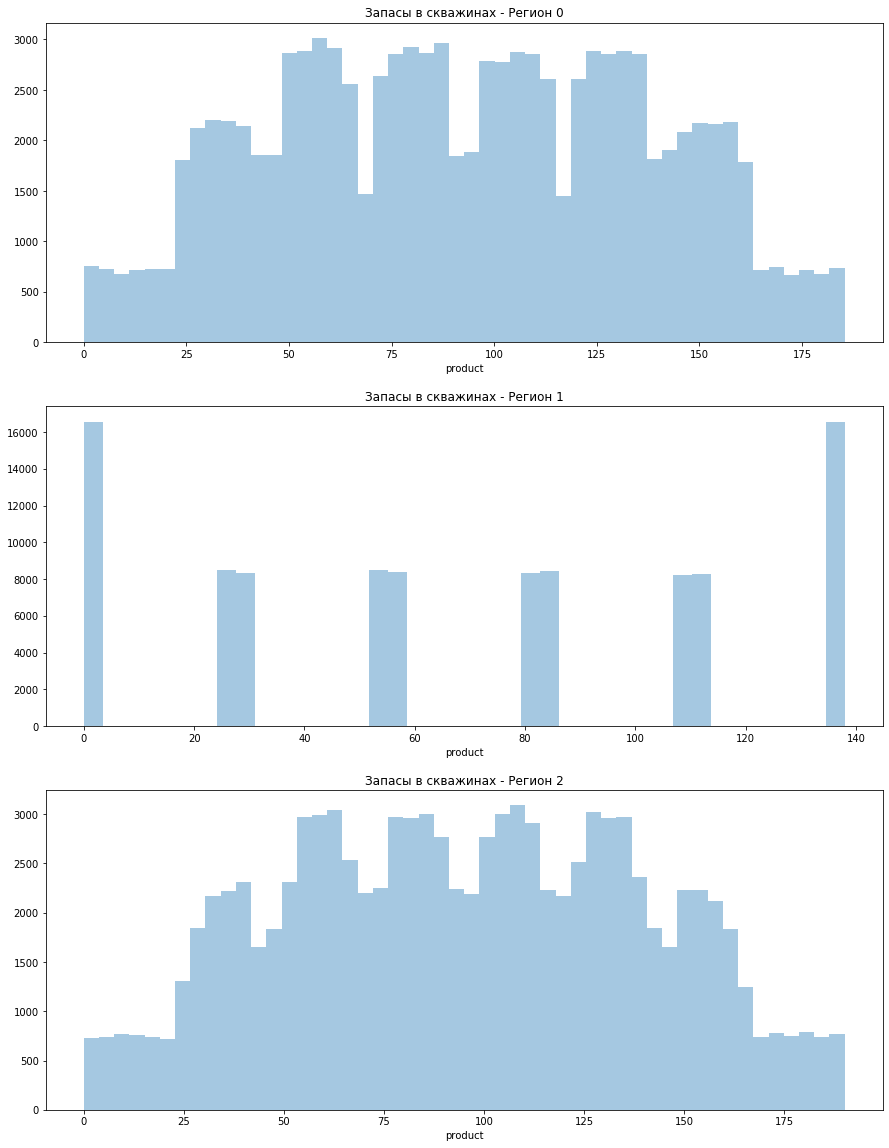

In [37]:
#Строю гистограммы распределения по объёмам запасов в скважинах
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1,
    figsize=(15, 20)
)

sns.distplot(df0['product'], kde=False, ax=ax1)
ax1.set_title("Запасы в скважинах - Регион 0")

sns.distplot(df1['product'], kde=False, ax=ax2)
ax2.set_title("Запасы в скважинах - Регион 1")

sns.distplot(df2['product'], kde=False, ax=ax3)
ax3.set_title("Запасы в скважинах - Регион 2")

plt.show()


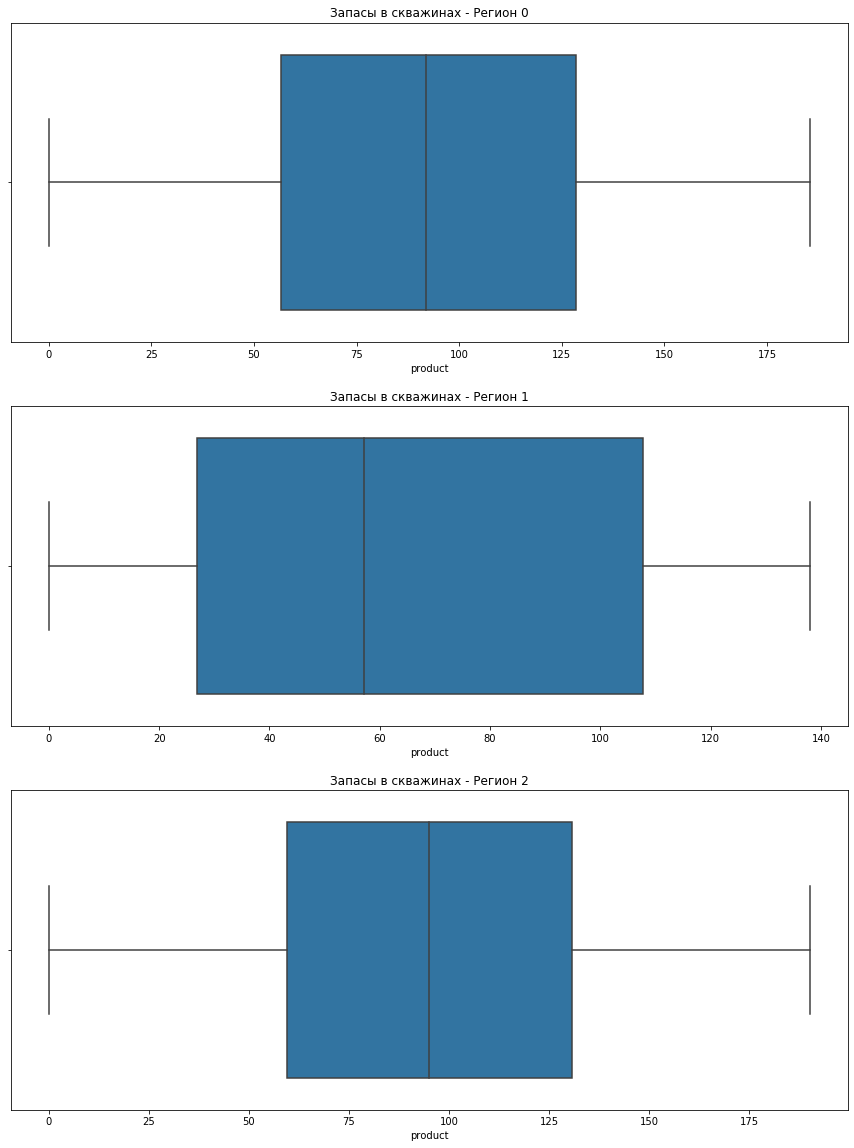

In [38]:
#Строю диаграммы размаха
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1,
    figsize=(15, 20)
)

sns.boxplot(y="product", data=df0, hue="product", orient="h", ax=ax1)
ax1.set_title("Запасы в скважинах - Регион 0")

sns.boxplot(y="product", data=df1, hue="product", orient="h", ax=ax2)
ax2.set_title("Запасы в скважинах - Регион 1")

sns.boxplot(y="product", data=df2, hue="product", orient="h", ax=ax3)
ax3.set_title("Запасы в скважинах - Регион 2")

plt.show()

## Вывод к Шагу 1

Для построения модели для определения региона, где добыча принесёт наибольшую прибыль предоставлены 3 датасета, состоящий из 5 столбцов с данными и 100 000 строк каждый. 

<br>Каждый объект в наборе данных — это информация об одной скважине. Известно:
<br>• id — уникальный идентификатор скважины;
<br>• f0, f1, f2 — три признака точек (значимые признаки);
<br>• product — объём запасов в скважине (тыс. баррелей).

Целевым признаком является столбец *'product'*, именно с ним будет работать наша модель.
Пропуски данных в датасетах отсутствуют, однако имеется столбец *'id'*, который не будет использован при обучени модели и дальныейшем анализе, поэтому принято решение удалить его.
<br>Данные в столбцах *'f0', 'f1', 'f2'* стандартизированы, их подготовка не требуется.

<br>Построенные гистограммы по распределению запасов нефти в регионах указывают на то, что в **Регионе 1** распределение оказалось далеким от нормального, в **Регионах 0 и 2** распределение близкое к нормальному.
<br>Судя по Диаграммам размаха, запасы нефти в скважинах укладываются в 1,5 межквартильных интервала, явные "выбросы" отсутствуют.
<br>Можно приступать к обучению модели.

# 2. Обучение и проверка модели

In [39]:
#Из библиотеки sklearn импортирую Линейную регрессию, метрику MSE и train_test_split для разделения датасетов на выборки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
#Объявляю функцию, для обучения модели
def regression(df):
    target = df['product'] #Выделяю целевой признак
    features = df.drop(['product'], axis=1) #Выделяю признаки
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

    linear_model = LinearRegression()
    linear_model.fit(features_train, target_train)
    linear_predictions = linear_model.predict(features_valid)
    linear_mse = mean_squared_error(target_valid, linear_predictions)
    linear_rmse = linear_mse**0.5
    mean_predicted_reserve = pd.Series(linear_predictions).mean()
    return linear_predictions, linear_mse, linear_rmse, mean_predicted_reserve, target_valid    

Обучим модель для **Региона 0** и найдем среднюю ошибку (RMSE). Все выборки и переменные для этого региона будут с **индексом 0**.

In [41]:
linear_predictions_0, linear_mse_0, linear_rmse_0, mean_predicted_reserve_0, target_valid_0 = regression(df0)
print('Средний запас предсказанного сырья для Региона 0:', mean_predicted_reserve_0, 'тыс. баррелей')
print('Для "Региона 0" RMSE =', linear_rmse_0, 'тыс. баррелей')

Средний запас предсказанного сырья для Региона 0: 92.59256778438038 тыс. баррелей
Для "Региона 0" RMSE = 37.5794217150813 тыс. баррелей


Обучим модель для **Региона 1** и найдем среднюю ошибку (RMSE). Все выборки и переменные для этого региона будут с **индексом 1**.

In [42]:
linear_predictions_1, linear_mse_1, linear_rmse_1, mean_predicted_reserve_1, target_valid_1 = regression(df1)
print('Средний запас предсказанного сырья для Региона 1:', mean_predicted_reserve_1, 'тыс. баррелей')
print('Для "Региона 1" RMSE =', linear_rmse_1, 'тыс. баррелей')

Средний запас предсказанного сырья для Региона 1: 68.728546895446 тыс. баррелей
Для "Региона 1" RMSE = 0.893099286775616 тыс. баррелей


Обучим модель для **Региона 2** и найдем среднюю ошибку (RMSE). Все выборки и переменные для этого региона будут с **индексом 2**.

In [43]:
linear_predictions_2, linear_mse_2, linear_rmse_2, mean_predicted_reserve_2, target_valid_2 = regression(df2)
print('Средний запас предсказанного сырья для Региона 2:', mean_predicted_reserve_2, 'тыс. баррелей')
print('Для "Региона 2" RMSE =', linear_rmse_2, 'тыс. баррелей')

Средний запас предсказанного сырья для Региона 2: 94.96504596800489 тыс. баррелей
Для "Региона 2" RMSE = 40.02970873393434 тыс. баррелей


In [44]:
columns = ['region', 'mse', 'rmse', 'mean_predicted_oil_reserve']
region_0 = ['Region 0', linear_mse_0, linear_rmse_0, mean_predicted_reserve_0]
region_1 = ['Region 1', linear_mse_1, linear_rmse_1, mean_predicted_reserve_1]
region_2 = ['Region 2', linear_mse_2, linear_rmse_2, mean_predicted_reserve_2] 

regions_pivot = pd.DataFrame([region_0, region_1, region_2], columns = columns)
display(regions_pivot)

,region,mse,rmse,mean_predicted_oil_reserve
0,Region 0,1412.212936,37.579422,92.592568
1,Region 1,0.797626,0.893099,68.728547
2,Region 2,1602.377581,40.029709,94.965046


## Вывод к Шагу 2

По результатам Шага 2 мы обучили 3 модели *Линейной регрессии* для предсказания вероятных запасов нефти по скважинам в регионе. Согласно сводной табице, наименьшая **RMSE = 0.893099** характерна для модели, обученной на данных **Региона 1**. При этом максимальный **Средний запас предсказанного сырья = 94.965046** характерен для **Региона 2**, однако для предсказаний по этому региону **RMSE = 40.029709**, что в свою очередь является максимальным показателем ошибки.

Стоит также обратить внимание на то, что в **Регионе 2** около 1600 скважен с запасом 0.

# 3. Подготовка к расчёту прибыли

По условиям задачи при разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли.
Бюджет на разработку скважин в регионе — 10 млрд рублей. Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
<br>Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [45]:
#Объявляю переменные для расчетов
#Количество скважин в регионе для разработки
hole_quantity = 200
#Бюджет на разработку скважин в регионе
bore_budget = 10000000000
#Бюджет на разработку одной скважины
one_hole_budget = bore_budget / hole_quantity
#Прибыль от продажи 1000 баррелей
profit = 450000
#Минимальный запас для безубыточной работы скважины
min_reserve = one_hole_budget/profit
print(one_hole_budget)
print()
print('Достаточный объём сырья для безубыточной разработки новой скважины', round(min_reserve, 2), 'тыс. баррелей')

50000000.0

Достаточный объём сырья для безубыточной разработки новой скважины 111.11 тыс. баррелей


In [46]:
#Для сравнения объёма сырья для безубыточной разработки скважины со средним запасом в каждом регионе объявляю функцию
def profit_region(reserve):
    if reserve >= min_reserve:
        return 1
    else:
        return 0
#Применяю функцию для определения прибыльных регионов
regions_pivot['region_is_profitable'] = regions_pivot['mean_predicted_oil_reserve'].apply(profit_region)
display(regions_pivot)

,region,mse,rmse,mean_predicted_oil_reserve,region_is_profitable
0,Region 0,1412.212936,37.579422,92.592568,0
1,Region 1,0.797626,0.893099,68.728547,0
2,Region 2,1602.377581,40.029709,94.965046,0


## Вывод к Шагу 3

На Шаге 3 определено значение минимального запаса для безубыточной работы скважины, оно равно 111.11 тыс. баррелей. Ключевые значения для расчётов сохранены в отдельных переменных.
<br>Исходя из результатов, нельзя судить о прибыльности региона в общем, следовательно, переходим к расчёту прибыли и рисков.

# 4. Функция расчёта прибыли

In [47]:
#Объявляю функцию для расчета прибыли
def revenue(target_valid, linear_predictions, quantity):
    predictions_sorted = pd.Series(linear_predictions).sort_values(ascending=False)
    target = target_valid.reset_index().drop(['index'], axis=1)
    target = pd.Series(target['product'])
    selected = target[predictions_sorted.index][:quantity]
    sum_profit = (selected.sum()*profit) - bore_budget
    return round(sum_profit, 2)

In [48]:
print('Прибыль по 200 скважинам с максимальными значениями предсказаний по Региону 0 равна', revenue(target_valid_0, linear_predictions_0, 200))
print('Прибыль по 200 скважинам с максимальными значениями предсказаний по Региону 1 равна', revenue(target_valid_1, linear_predictions_1, 200))
print('Прибыль по 200 скважинам с максимальными значениями предсказаний по Региону 2 равна', revenue(target_valid_2, linear_predictions_2, 200))

Прибыль по 200 скважинам с максимальными значениями предсказаний по Региону 0 равна 3320826043.14
Прибыль по 200 скважинам с максимальными значениями предсказаний по Региону 1 равна 2415086696.68
Прибыль по 200 скважинам с максимальными значениями предсказаний по Региону 2 равна 2710349963.6


## Вывод к Шагу 4

Функция для расчета прибыли составлена. Прибыли по регионам рассчитаны. Переходим к расчету прибыли и рисков.

# 5. Расчёт прибыли и рисков для каждого региона 

Как можно было увидеть из гистограмм в Шаге 1, распределение запасов нефти в скважинах далеко от нормального, особенно в **Регионе 1**. Следовательно для нахождения средней прибыли, 95%-й доверительного интервала и риска убытков воспользуемся техникой *бутстреп*.

In [49]:
#Объявляю переменную state, которая определит выборки
state = np.random.RandomState(12345)

#Объявляю функцию для сбора показателей прибыли техникой бутстреп
def bootstrap_revenue(target_valid, linear_predictions, dots, quantity):
    values = []
    predicted_values = []
    for i in range(1000):
        target_subsample = (target_valid
                            .reset_index()
                            .drop(['index'], axis=1)
                            .sample(frac=dots/len(target_valid), replace=True, random_state = state)
                           )
        predictions_subsample = pd.Series(linear_predictions)[target_subsample.index]
        sorted_predictions_subsample = predictions_subsample.sort_values(ascending=False)
        target_subsample = pd.Series(target_subsample['product'])
        selected_target_subsample = target_subsample[sorted_predictions_subsample.index][:quantity]
        selected_sum_profit = (selected_target_subsample.sum()*profit) - quantity*one_hole_budget
        values.append(selected_sum_profit)
    return values

In [50]:
def risks(values):
    negative = []
    for i in values:
        if i <= 0:
            negative.append(i)
    return len(negative)/len(values)*100        

In [51]:
values_0 = bootstrap_revenue(target_valid_0, linear_predictions_0, 500, 200)
risks_0 =  risks(values_0)


values_0 = pd.Series(values_0)

confidence_interval_0 = (values_0.quantile(0.025), values_0.quantile(0.975))
print(confidence_interval)

mean_0 = values_0.mean()
print("Средняя выручка:", mean_0)
print("Доверительный интервал для Региона 0:", confidence_interval_0)
print('Риск убытков в регионе', risks_0,'%')

(-102090094.83793654, 947976353.358369)
Средняя выручка: 425938526.9105923
Доверительный интервал для Региона 0: (-102090094.83793654, 947976353.358369)
Риск убытков в регионе 6.0 %


In [52]:
values_1 = bootstrap_revenue(target_valid_1, linear_predictions_1, 500, 200)
risks_1 =  risks(values_1)

values_1 = pd.Series(values_1)
confidence_interval_1 = (values_1.quantile(0.025), values_1.quantile(0.975))

mean_1 = values_1.mean()
print("Средняя выручка:", mean_1)
print("Доверительный интервал для Региона 1:", confidence_interval_1)
print('Риск убытков в регионе', risks_1,'%')

Средняя выручка: 518259493.69732493
Доверительный интервал для Региона 1: (128123231.43308629, 953612982.0669085)
Риск убытков в регионе 0.3 %


In [53]:
values_2 = bootstrap_revenue(target_valid_2, linear_predictions_2, 500, 200)
risks_2 =  risks(values_2)

values_2 = pd.Series(values_2)
confidence_interval_2 = (values_2.quantile(0.025), values_2.quantile(0.975))

mean_2= values_2.mean()
print("Средняя выручка:", mean_2)
print("Доверительный интервал для Региона 2:", confidence_interval_2)
print('Риск убытков в регионе', risks_2,'%')

Средняя выручка: 420194005.34405005
Доверительный интервал для Региона 2: (-115852609.16001143, 989629939.844574)
Риск убытков в регионе 6.2 %


In [54]:
#Объявляю функцию для определения прибыли по регионам исходя из предсказанных моделью значений
#в основе данной функции применена техника bootstrap
def predict_bootstrap_revenue(linear_predictions, dots, quantity):
    predicted_values = []
    for i in range(1000):
        predicted_subsample = (pd.Series(linear_predictions)
                               .sample(frac=dots/len(linear_predictions), replace=True, random_state = state)
                               .sort_values(ascending=False)
                               )
        predicted_subsample = predicted_subsample[:quantity]
        predicted_subsample_sum_profit = (predicted_subsample.sum()*profit) - quantity*one_hole_budget
        predicted_values.append(predicted_subsample_sum_profit)
    return predicted_values

In [55]:
predicted_values_0 = pd.Series(predict_bootstrap_revenue(linear_predictions_0, 500, 200))
predicted_risks_0 =  risks(predicted_values_0)

predicted_confidence_interval_0 = (predicted_values_0.quantile(0.025), predicted_values_0.quantile(0.975))
predicted_mean_0 = predicted_values_0.mean()

print("Средняя выручка для Региона 0:", predicted_mean_0)
print("Доверительный интервал прибыли для Региона 0:", predicted_confidence_interval_0)
print('Риск убытков в Регионе 0', predicted_risks_0,'%')

Средняя выручка для Региона 0: 357596128.21251184
Доверительный интервал прибыли для Региона 0: (135463963.2766859, 565546143.8525171)
Риск убытков в Регионе 0 0.1 %


In [56]:
predicted_values_1 = pd.Series(predict_bootstrap_revenue(linear_predictions_1, 500, 200))
predicted_risks_1 =  risks(predicted_values_1)

predicted_confidence_interval_1 = (predicted_values_1.quantile(0.025), predicted_values_1.quantile(0.975))
predicted_mean_1 = predicted_values_1.mean()

print("Средняя выручка для Региона 1:", predicted_mean_1)
print("Доверительный интервал прибыли для Региона 1:", predicted_confidence_interval_1)
print('Риск убытков в Регионе 1', predicted_risks_1,'%')

Средняя выручка для Региона 1: 446241474.94939965
Доверительный интервал прибыли для Региона 1: (47302691.56006905, 841425874.3577042)
Риск убытков в Регионе 1 1.4000000000000001 %


In [57]:
predicted_values_2 = pd.Series(predict_bootstrap_revenue(linear_predictions_2, 500, 200))
predicted_risks_2 =  risks(predicted_values_2)

predicted_confidence_interval_2 = (predicted_values_2.quantile(0.025), predicted_values_2.quantile(0.975))
predicted_mean_2 = predicted_values_2.mean()

print("Средняя выручка для Региона 2:", predicted_mean_2)
print("Доверительный интервал прибыли для Региона 2:", predicted_confidence_interval_2)
print('Риск убытков в Регионе 2', predicted_risks_2,'%')

Средняя выручка для Региона 2: 275539442.72628367
Доверительный интервал прибыли для Региона 2: (85476110.04429904, 471662709.83956754)
Риск убытков в Регионе 2 0.5 %


## Вывод к Шагу 5

Техникой *бутстреп* определены средняя прибыль, 95%-й доверительный интервал и риск убытков в каждом из трех регионов. Несложно видеть, что единственным подходящим для организации добычи нефти является **Регион 1**. Именно в этом регионе 95% доверительный интервал оказался положительным и риск убытков не превышает 2,5%.

Анализ данных, полученных по предсказаниям модели линейной регрессии также выделили **Регион 1** как наиболее перспективный для разработки, поскольку средняя выручка составила 453269774.56, что является наиболее высоким показателем среди всех трех регионов. А доля риска для **Региона 1** составлет 1.5% что не попадает в границы доверительного интервала.

# Общий вывод

Для построения модели для определения региона, где добыча принесёт наибольшую прибыль предоставлены 3 датасета, состоящий из 5 столбцов с данными и 100 000 строк каждый. 
<br>Пропуски данных в датасетах отсутствуют, данные в столбцах *'f0', 'f1', 'f2'* стандартизированы, их подготовка не требуется. Столбец *'id'* был удален, поскольку не представлял важности как признак для обучения модели.
<br>Целевым признаком является столбец *'product'*, на нем было обучены три модели *Линейной регрессии* для кажого региона.

Согласно сводной табице, составленной по результатам предсказания моделей, наименьшая **RMSE = 0.893099** характерна для модели, обученной на данных **Региона 1**. При этом максимальный **Средний запас предсказанного сырья = 94.965046** характерен для **Региона 2**, однако для предсказаний по этому региону **RMSE = 40.029709**, что в свою очередь является максимальным показателем ошибки.

По результатам работы видно, что единственным подходящим для организации добычи нефти является **регион 2**. Именно в этом регионе 95% доверительный интервал оказался положительным и риск убытков не превышает 2,5%. Анализ данных, полученных по предсказаниям модели линейной регрессии также выделили **Регион 1** как наиболее перспективный для разработки, поскольку средняя выручка составила 453269774.56, что является наиболее высоким показателем среди всех трех регионов. А доля риска для **Региона 1** составлет 1.5% что не попадает в границы доверительного интервала.